# Caclulating rolling returns over different horizons

In [1]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

indices <- Indices()

In [2]:
numMonths <- 12 * 10 #10 years, a typical "long-term" buy and hold horizon
indexName <- "NIFTY 50 TR" #always use total return index where feasible

trIndex <- data.frame(indices$NseTimeSeries() %>%
    filter(NAME == indexName) %>%
    select(TIME_STAMP, CLOSE)) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))

trXts <- xts(trIndex$CLOSE, trIndex$TIME_STAMP)
monthlyTrReturns <- monthlyReturn(trXts)

#ignore the first and last months
monthlyTrReturns <- monthlyTrReturns[-1]
monthlyTrReturns <- monthlyTrReturns[-nrow(monthlyTrReturns)]

In [3]:
#caculate rolling returns
rollingRets <- rollapply(monthlyTrReturns, numMonths, Return.annualized)
rollingRets <- na.omit(rollingRets)*100
names(rollingRets) <- c('R')

rollingRetDf <- data.frame(rollingRets)
rollingRetDf$T <- index(rollingRets)

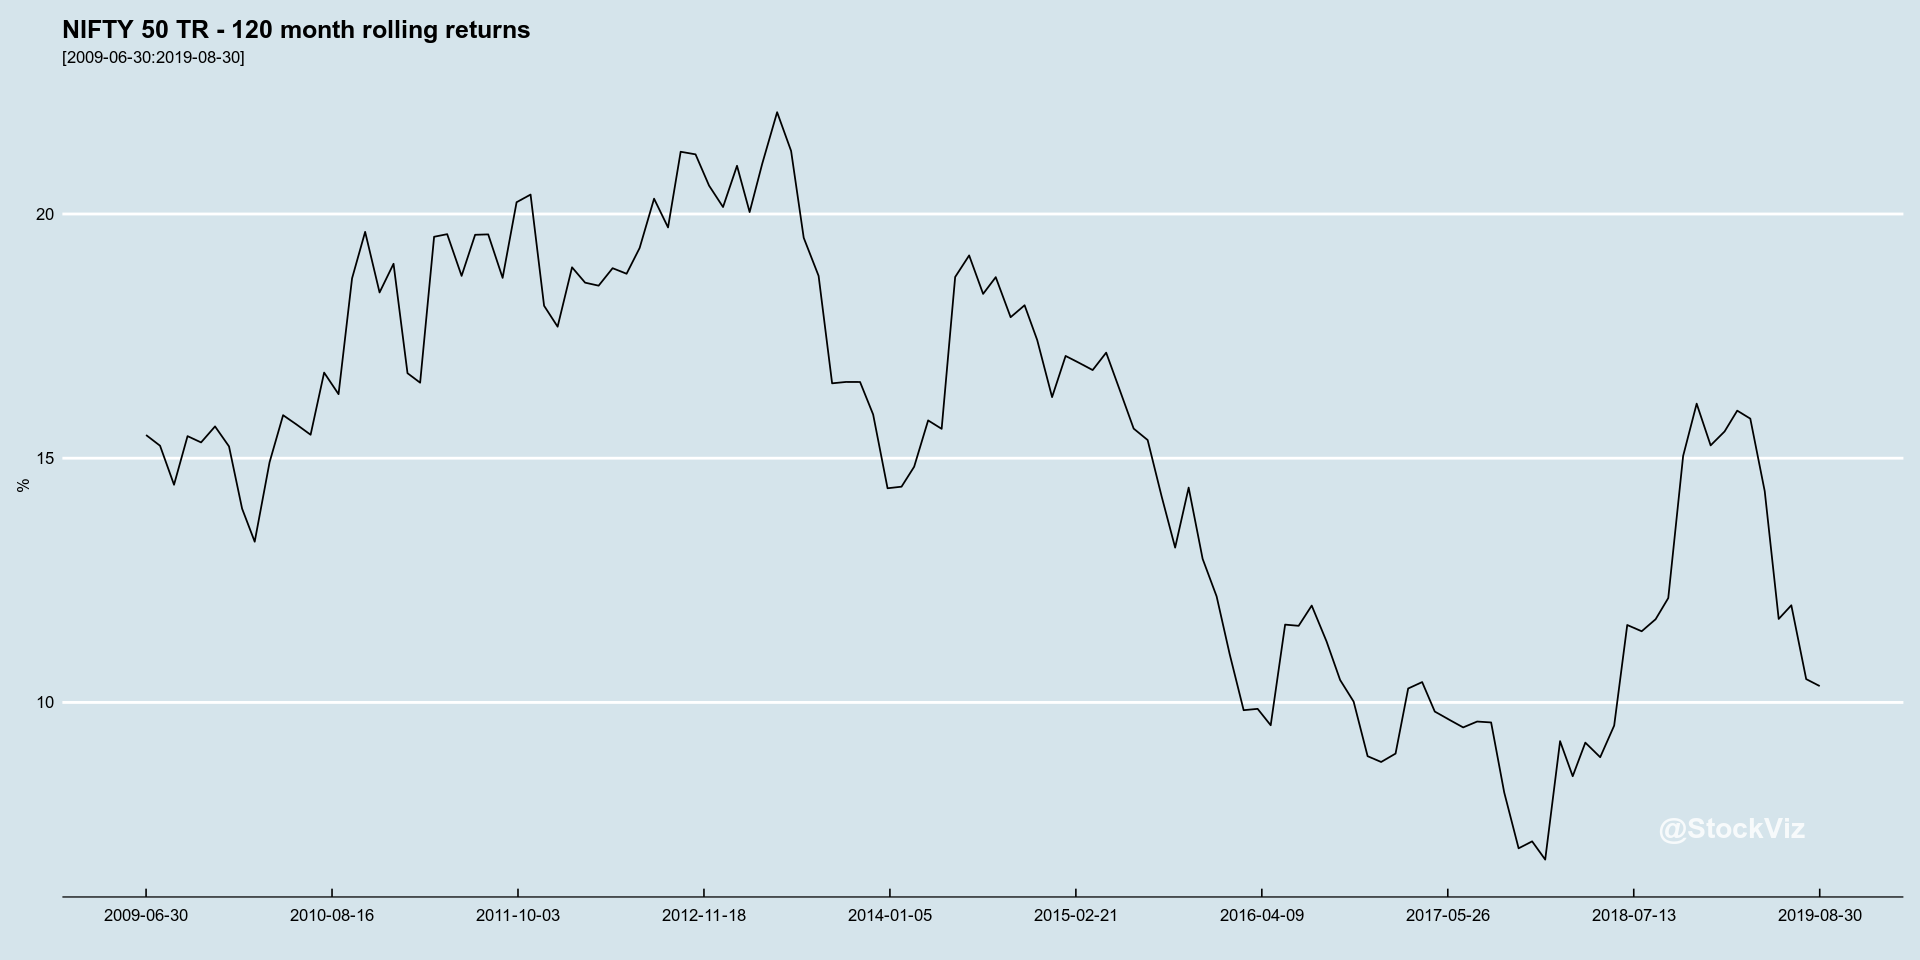

In [4]:
#plot rolling returns
firstDate <- first(index(rollingRets))
lastDate <- last(index(rollingRets))
xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

ggplot(rollingRetDf, aes(x=T, y=R)) +
    theme_economist() +
    geom_line() +
    scale_x_date(breaks = xAxisTicks) +
    labs(x='', y='%', color='', title=sprintf("%s - %d month rolling returns", indexName, numMonths), 
         subtitle=sprintf("[%s:%s]", firstDate, lastDate)) +
    annotate("text", x=lastDate, y=min(rollingRets), label = "@StockViz", hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)

In [5]:
print(summary(rollingRets))

     Index                  R         
 Min.   :2009-06-30   Min.   : 6.782  
 1st Qu.:2012-01-15   1st Qu.:11.589  
 Median :2014-07-31   Median :15.606  
 Mean   :2014-07-30   Mean   :15.074  
 3rd Qu.:2017-02-14   3rd Qu.:18.639  
 Max.   :2019-08-30   Max.   :22.084  


This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)